## Extraction of data
We start off by getting the data from the official github urls present for fashion mnist data sets.

4 files are downloaded in zipped format (.gz) (2 for image data (test and train), 2 for label data(test and train))

This data is stored in a directory on google drive 'mnist_fashion'

In [ ]:
import os
import urllib.request
import tempfile
##URLs for the datafiles of label and image test and train data
url_list = ['https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-images-idx3-ubyte.gz?raw=true',
            'https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-labels-idx1-ubyte.gz?raw=true',
            'https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-images-idx3-ubyte.gz?raw=true',
            'https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/train-labels-idx1-ubyte.gz?raw=true']
filenames = ['test_images.gz','test_label.gz', 'train_images.gz', 'train_label.gz'] #downloaded file names
DATA_ROOT = 'mnist_fashion'  # Create a temporary directory.
os.mkdir(DATA_ROOT) #new directory to save the data
for i,j in zip(url_list,filenames):
  _data_url = i
  _data_filepath = os.path.join(DATA_ROOT, j)
  urllib.request.urlretrieve(_data_url, _data_filepath) #saving of files

## Unzip files and Image normalization

Files are unzipped using gzip command and are further saved in a pandas dataframe.

In the next step the pixels data of the image files are further normalized by dividing it by 255.

The normalized pixel data and the target label are then merged together in a single dataframe to form the respective test and train dataframes. 

Later these two datarames are converted into csv files and are saved onto the google drive

In [ ]:
import gzip
import numpy as np
import pandas as pd 
##opening of image files and normalizing the image files and saving in dataframe
file = gzip.open('/content/mnist_fashion/train_images.gz',"r")

train_images = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape(60000,784))
df_trainimages = train_images/255

file = gzip.open('/content/mnist_fashion/test_images.gz',"r")

test_images = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=16).reshape(10000,784))
df_testimages = test_images/255
##opening of labelfiles and saving as dataframes
file = gzip.open('/content/mnist_fashion/train_label.gz',"r")
train_label = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=8))
train_label.columns = ['label']

file = gzip.open('/content/mnist_fashion/test_label.gz',"r")
test_label = pd.DataFrame(np.frombuffer(file.read(), dtype=np.uint8, offset=8))
test_label.columns = ['label']

In [ ]:
#joining train images and its labels
df_train = pd.concat([df_trainimages, train_label],axis=1, join='inner')

In [ ]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,5
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0,0


In [ ]:
#joining images and label data and forming a common dataframes 
df_test = pd.concat([df_testimages, test_label],axis=1, join='inner')

In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.011765,0.0,0.011765,0.682353,0.741176,0.262745,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003922,0.000000,...,0.227451,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.082353,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.007843,0.0,0.003922,0.003922,0.0,0.000000,0.000000,...,0.047059,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,9
9996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.121569,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
9997,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,8
9998,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1


In [ ]:
import os
os.mkdir('train')
os.mkdir('test')
df_train.to_csv('train/train_data.csv', index = False)
df_test.to_csv('test/test_data.csv', index = False)

## Install TFX and other libraries

In [ ]:
!pip install -U tfx

In [ ]:
#Imports for the further process
import os
import pprint
import tempfile
import urllib
import absl
import tensorflow as tf
import tensorflow_model_analysis as tfma
tf.get_logger().propagate = False
pp = pprint.PrettyPrinter()
from tfx import v1 as tfx

%load_ext tfx.orchestration.experimental.interactive.notebook_extensions.skip

In [ ]:
from tfx.components import Evaluator
from tfx.components import ExampleValidator
from tfx.components import ImportExampleGen
from tfx.components import Pusher
from tfx.components import SchemaGen
from tfx.components import StatisticsGen
from tfx.components import Trainer
from tfx.components import Transform
from tfx.orchestration import metadata
from tfx.orchestration import pipeline
from tfx.orchestration.beam.beam_dag_runner import BeamDagRunner
from tfx.proto import pusher_pb2
from tfx.proto import trainer_pb2
from tfx.components import CsvExampleGen
from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext

In [ ]:
# This is the path where your model will be pushed for serving at the end of the pipeline.
_serving_model_dir = os.path.join(
    tempfile.mkdtemp(), 'serving_model/mnist-fashion') #serving directory for the end

# Set up logging of the data
absl.logging.set_verbosity(absl.logging.INFO)

##ExampleGen

This is the first step of pipeline formation here the data is ingested into the pipeline. Here is where we first fetch the train csv files.

Here, in the background the the data is self splitted in the ratio 2:1 in train set and evaluation set.

Over here we use CsvExampleGen since the data is in CSV format. It takes the directory where the data is present for it to ingest as an input in our case the data was present in '/train' directory

In [ ]:
data_dir = 'train/' #data directory where the train data is saved in csv format
context = InteractiveContext() #interactive way to see a component in a pipeline

In [ ]:
example_gen = CsvExampleGen(input_base=data_dir) #running examplegen
context.run(example_gen) #shows execution and the result artifacts

INFO:absl:Running driver for CsvExampleGen
INFO:absl:MetadataStore with DB connection initialized
INFO:absl:select span and version = (0, None)
INFO:absl:latest span and version = (0, None)
INFO:absl:Running executor for CsvExampleGen
INFO:absl:Generating examples.


INFO:absl:Processing input csv data train/* to TFExample.
INFO:absl:Examples generated.
INFO:absl:Running publisher for CsvExampleGen
INFO:absl:MetadataStore with DB connection initialized


ExecutionResult(
    component_id: CsvExampleGen
    execution_id: 1
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=CsvExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}))

##StatisticsGen

Statistics gen is the second step in the pipeline, it takes the output of ExampleGen and gives the statistical insights about the features (eg. max value, min value, median etc.)  which further helps us understand the data better.

It is highly relevent in the production environment as it produces insights about the realtime data.

In [ ]:
statistics_gen = StatisticsGen(examples=example_gen.outputs['examples']) #running statistic gen
context.run(statistics_gen)

INFO:absl:Excluding no splits because exclude_splits is not set.
INFO:absl:Running driver for StatisticsGen
INFO:absl:MetadataStore with DB connection initialized
INFO:absl:Running executor for StatisticsGen
INFO:absl:Generating statistics for split train.
INFO:absl:Statistics for split train written to /tmp/tfx-interactive-2022-06-12T20_46_37.548238-9l71y8l9/StatisticsGen/statistics/2/Split-train.
INFO:absl:Generating statistics for split eval.
INFO:absl:Statistics for split eval written to /tmp/tfx-interactive-2022-06-12T20_46_37.548238-9l71y8l9/StatisticsGen/statistics/2/Split-eval.
INFO:absl:Running publisher for StatisticsGen
INFO:absl:MetadataStore with DB connection initialized


ExecutionResult(
    component_id: StatisticsGen
    execution_id: 2
    outputs:
        statistics: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=StatisticsGen, output_key=statistics, additional_properties={}, additional_custom_properties={}))

In [ ]:
context.show(statistics_gen.outputs['statistics']) #context shows interactive statistics of the data

##SchemaGen

This is the third step in our pipeline, it takes the output of the statistics gen  and gives us information about the schema of the data. The schema of the data is stored in the file 'schema.pbtxt' in the SchemaGen section of the pipeline

It contains information like feature data type, feature name, presence etc.

In [ ]:
schema_gen = SchemaGen(statistics=statistics_gen.outputs['statistics']) #running schema gen
context.run(schema_gen)

INFO:absl:Excluding no splits because exclude_splits is not set.
INFO:absl:Running driver for SchemaGen
INFO:absl:MetadataStore with DB connection initialized
INFO:absl:Running executor for SchemaGen
INFO:absl:Processing schema from statistics for split train.
INFO:absl:Processing schema from statistics for split eval.
INFO:absl:Schema written to /tmp/tfx-interactive-2022-06-12T20_46_37.548238-9l71y8l9/SchemaGen/schema/3/schema.pbtxt.
INFO:absl:Running publisher for SchemaGen
INFO:absl:MetadataStore with DB connection initialized


ExecutionResult(
    component_id: SchemaGen
    execution_id: 3
    outputs:
        schema: OutputChannel(artifact_type=Schema, producer_component_id=SchemaGen, output_key=schema, additional_properties={}, additional_custom_properties={}))

In [ ]:
context.show(schema_gen.outputs['schema']) #schema artifact dispayed

,Type,Presence,Valency,Domain
Feature name,,,,
'0',FLOAT,required,,-
'1',FLOAT,required,,-
'10',FLOAT,required,,-
'100',FLOAT,required,,-
'101',FLOAT,required,,-
...,...,...,...,...
'96',FLOAT,required,,-
'97',FLOAT,required,,-
'98',FLOAT,required,,-


## ExampleValidator

It detects the anomalies in the ingested data

In [ ]:
example_validator = ExampleValidator(statistics=statistics_gen.outputs['statistics'],
                                     schema=schema_gen.outputs['schema']) #running example validator

INFO:absl:Excluding no splits because exclude_splits is not set.


In [ ]:
context.run(example_validator) #context and anomalies as artifact

INFO:absl:Running driver for ExampleValidator
INFO:absl:MetadataStore with DB connection initialized
INFO:absl:Running executor for ExampleValidator
INFO:absl:Validating schema against the computed statistics for split train.
INFO:absl:Validation complete for split train. Anomalies written to /tmp/tfx-interactive-2022-06-12T20_46_37.548238-9l71y8l9/ExampleValidator/anomalies/4/Split-train.
INFO:absl:Validating schema against the computed statistics for split eval.
INFO:absl:Validation complete for split eval. Anomalies written to /tmp/tfx-interactive-2022-06-12T20_46_37.548238-9l71y8l9/ExampleValidator/anomalies/4/Split-eval.
INFO:absl:Running publisher for ExampleValidator
INFO:absl:MetadataStore with DB connection initialized


ExecutionResult(
    component_id: ExampleValidator
    execution_id: 4
    outputs:
        anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=ExampleValidator, output_key=anomalies, additional_properties={}, additional_custom_properties={}))

## Trainer

It is the core module of the pipeline. It is responsible for training of the tensorflow model.

Firstly we create the trainer module which contains of 3 different functions.

1. Input fuction: it defines the features and labels required for the training part. We feed the tfrecord file, schema from schema generator, batch size

2. Model: Here we define the tensorflow model for training

3. Training the model: In this part we train the model with the arguments provided and further save the model and its values.

After creating the trainer module we feed it to the 'Trainer' of the pipeline which is fed with trainer module, example generator's output and 



In [ ]:
_trainer_module_file = 'module1.py'

In [ ]:
%%writefile {_trainer_module_file}

from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils
from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2

_FEATURE_KEYS = [str(feat) for feat in range(0,784)]
 
_LABEL_KEY = 'label'

_TRAIN_BATCH_SIZE = 30
_EVAL_BATCH_SIZE = 10

# Since we're not generating or creating a schema, we will instead create
# a feature spec.  Since there are a fairly small number of features this is
# manageable for this dataset.
_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat()

import tensorflow
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_model():
  inputs = [Input(shape=(1,), name =f) for f in _FEATURE_KEYS]
  all_input = Concatenate()(inputs)
  dense1 = Dense(256, activation='relu')(all_input)
  dense2 = Dense(128, activation = 'relu')(dense1)
  dense3 = Dense(10, activation='relu')(dense2)
  model = Model(inputs=inputs, outputs=dense3)

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model
def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """

  # This schema is usually either an output of SchemaGen or a manually-curated
  # version provided by pipeline author. A schema can also derived from TFT
  # graph if a Transform component is used. In the case when either is missing,
  # `schema_from_feature_spec` could be used to generate schema from very simple
  # feature_spec, but the schema returned would be very primitive.
  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC)

  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE)
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE)

  model = build_model()
  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps, epochs = 10)

  model.save(fn_args.serving_model_dir, save_format='tf') #save the model

Writing module1.py


In [ ]:
trainer = tfx.components.Trainer(module_file= _trainer_module_file,
                                 examples=example_gen.outputs['examples'],
                                 train_args=tfx.proto.TrainArgs(num_steps=100),
                                 eval_args=tfx.proto.EvalArgs(num_steps=5)) #trainer defination

In [ ]:
context.run(trainer) #context of data

## Pusher

This is the last part of our tfx pipeline it pipeline. It takes the output of the trainer (i.e. the trained model) as its input in our pipeline and pushes the model in the base_directory from where different APIs can be used to access the model.

In [ ]:
#pushing the data to final directory mentioned in beginning
pusher = tfx.components.Pusher(model=trainer.outputs['model'],
                               push_destination=tfx.proto.PushDestination(
                                   filesystem=tfx.proto.PushDestination.Filesystem(
                                       base_directory=_serving_model_dir)))

context.run(pusher) #running the context

INFO:absl:Running driver for Pusher
INFO:absl:MetadataStore with DB connection initialized
INFO:absl:Running executor for Pusher
INFO:absl:Model version: 1655067833
INFO:absl:Model written to serving path /tmp/tmpnb6vu7nl/serving_model/mnist-fashion/1655067833.
INFO:absl:Model pushed to /tmp/tfx-interactive-2022-06-12T20_46_37.548238-9l71y8l9/Pusher/pushed_model/6.
INFO:absl:Running publisher for Pusher
INFO:absl:MetadataStore with DB connection initialized


ExecutionResult(
    component_id: Pusher
    execution_id: 6
    outputs:
        pushed_model: OutputChannel(artifact_type=PushedModel, producer_component_id=Pusher, output_key=pushed_model, additional_properties={}, additional_custom_properties={}))

## Automated Pipeline + Rest API

After individually inspecting all the parts of our pipeline carefully. Now, we try to automate our pipeline
We use only 3 components examplegen, trainer and pusher for the automated pipeline

We startoff with _trainer_module_file where we define the _input_fn, build_model and run_fn same as the above trainer module post that we create the pipeline with the above mentioned components and post that we orcestrate the pipeline and run the pipeline

In [ ]:
#defining pipelines for automated + rest api
PIPELINE_NAME = "mnist-fashion"
PIPELINE_ROOT = os.path.join('pipelines', PIPELINE_NAME) #root pipeline
SERVING_MODEL_DIR = os.path.join('serving_model', PIPELINE_NAME)
METADATA_PATH = os.path.join('metadata', PIPELINE_NAME, 'metadata.db') #metadata pipelinepath
absl.logging.set_verbosity(absl.logging.INFO)

In [ ]:
_trainer_module_file = 'mnisttrainer.py'

In [ ]:
%%writefile {_trainer_module_file}
#this is same as above file module1.py
from typing import List
from absl import logging
import tensorflow as tf
from tensorflow import keras
from tensorflow_transform.tf_metadata import schema_utils

from tfx import v1 as tfx
from tfx_bsl.public import tfxio
from tensorflow_metadata.proto.v0 import schema_pb2


_FEATURE_KEYS = [str(feat) for feat in range(0,784)] #string name of features 0 to 783
_LABEL_KEY = "label" #target variable

_TRAIN_BATCH_SIZE = 20
_EVAL_BATCH_SIZE = 10

_FEATURE_SPEC = {
    **{
        feature: tf.io.FixedLenFeature(shape=[1], dtype=tf.float32)
           for feature in _FEATURE_KEYS
       },
    _LABEL_KEY: tf.io.FixedLenFeature(shape=[1], dtype=tf.int64)
}


def _input_fn(file_pattern: List[str],
              data_accessor: tfx.components.DataAccessor,
              schema: schema_pb2.Schema,
              batch_size: int = 200) -> tf.data.Dataset:
  """Generates features and label for training.

  Args:
    file_pattern: List of paths or patterns of input tfrecord files.
    data_accessor: DataAccessor for converting input to RecordBatch.
    schema: schema of the input data.
    batch_size: representing the number of consecutive elements of returned
      dataset to combine in a single batch

  Returns:
    A dataset that contains (features, indices) tuple where features is a
      dictionary of Tensors, and indices is a single Tensor of label indices.
  """
 
  
  return data_accessor.tf_dataset_factory(
      file_pattern,
      tfxio.TensorFlowDatasetOptions(
          batch_size=batch_size, label_key=_LABEL_KEY),
      schema=schema).repeat()

import tensorflow
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def build_model(): 
  inputs = [Input(shape=(1,), name =f) for f in _FEATURE_KEYS]
  all_input = Concatenate()(inputs)
  dense1 = Dense(256, activation='relu')(all_input)
  dense2 = Dense(128, activation = 'relu')(dense1)
  dense3 = Dense(10, activation='relu')(dense2)
  model = Model(inputs=inputs, outputs=dense3)

  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model


# TFX Trainer will call this function.
def run_fn(fn_args: tfx.components.FnArgs):
  """Train the model based on given args.

  Args:
    fn_args: Holds args used to train the model as name/value pairs.
  """


  schema = schema_utils.schema_from_feature_spec(_FEATURE_SPEC)

  train_dataset = _input_fn(
      fn_args.train_files,
      fn_args.data_accessor,
      schema,
      batch_size=_TRAIN_BATCH_SIZE)
  eval_dataset = _input_fn(
      fn_args.eval_files,
      fn_args.data_accessor,
      schema,
      batch_size=_EVAL_BATCH_SIZE)

  model = build_model()

  model.fit(
      train_dataset,
      steps_per_epoch=fn_args.train_steps,
      validation_data=eval_dataset,
      validation_steps=fn_args.eval_steps, epochs=10)

  model.save(fn_args.serving_model_dir, save_format='tf')

Writing mnisttrainer.py


In [ ]:
def _create_pipeline(pipeline_name: str, pipeline_root: str, data_root: str,
                     module_file: str, serving_model_dir: str,
                     metadata_path: str) -> tfx.dsl.Pipeline:
#ingests the data in the pipeline
  example_gen = tfx.components.CsvExampleGen(input_base=data_dir)

  
#traines the model created
  trainer = tfx.components.Trainer(
      module_file=module_file,
      examples=example_gen.outputs['examples'],
      train_args=tfx.proto.TrainArgs(num_steps=100),
      eval_args=tfx.proto.EvalArgs(num_steps=5))


#pushes the model to a directory from where rest api would read
  pusher = tfx.components.Pusher(
      model=trainer.outputs['model'],
      push_destination=tfx.proto.PushDestination(
          filesystem=tfx.proto.PushDestination.Filesystem(
              base_directory=serving_model_dir)))

  # The below three components will be included in the pipeline.
  components = [
      example_gen,
      trainer,
      pusher,
  ]

  return tfx.dsl.Pipeline(
      pipeline_name=pipeline_name,
      pipeline_root=pipeline_root,
      metadata_connection_config=tfx.orchestration.metadata
      .sqlite_metadata_connection_config(metadata_path),
      components=components)

In [ ]:
tfx.orchestration.LocalDagRunner().run(
  _create_pipeline(
      pipeline_name=PIPELINE_NAME,
      pipeline_root=PIPELINE_ROOT,
      data_root=data_dir,
      module_file=_trainer_module_file,
      serving_model_dir=SERVING_MODEL_DIR,
      metadata_path=METADATA_PATH))

## Rest API

We try to call the model and predit from it using Rest API in the following part

In [ ]:

!pip install -Uq grpcio==1.26.0

     |████████████████████████████████| 2.4 MB 30.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx 1.8.0 requires grpcio<2,>=1.28.1, but you have grpcio 1.26.0 which is incompatible.
grpcio-status 1.46.3 requires grpcio>=1.46.3, but you have grpcio 1.26.0 which is incompatible.
google-cloud-pubsub 2.13.0 requires grpcio<2.0dev,>=1.38.1, but you have grpcio 1.26.0 which is incompatible.
google-cloud-bigquery 2.34.4 requires grpcio<2.0dev,>=1.38.1, but you have grpcio 1.26.0 which is incompatible.
apache-beam 2.39.0 requires grpcio<2,>=1.29.0, but you have grpcio 1.26.0 which is incompatible.


In [ ]:
import sys
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update
#downgrading to a lower version to run rest api

deb http://storage.googleapis.com/tensorflow-serving-apt testing tensorflow-model-server-2.8.0
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  70071      0 --:--:-- --:--:-- --:--:-- 70071
OK
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt testing InRelease [162 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ub

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 87 not upgraded.
Need to get 340 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt testing/tensorflow-model-server-2.8.0 amd64 tensorflow-model-server all 2.8.0 [340 MB]
Fetched 340 MB in 5s (70.1 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-server (2.8.0) ...


In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_mnist_model \
  --model_base_path="/content/serving_model/mnist-fashion" >server.log 2>&1

In [ ]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


In [ ]:
!saved_model_cli show --dir /content/serving_model/mnist-fashion/1655063984 --all

In [ ]:
import matplotlib.pyplot as plt
def show_image(index, title): #this function is created to see the image
  plt.figure()
  plt.imshow(test_images[index].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

In [ ]:
#creating test cases
import pandas as pd
test_df = pd.read_csv('/content/test/test_data.csv')

In [ ]:
test_images = test_df.loc[0:1].drop(['label'], axis =1)

In [ ]:
test_label = test_df.loc[0:1].label

In [ ]:
test_label

0    9
1    2
Name: label, dtype: int64

In [ ]:
test_images = np.array(test_images)
test_images.shape

(2, 784)

In [ ]:
test_list = []
for image in test_images:
  json_dict = dict()
  for index,value in enumerate(image):
      json_dict[(str(index))] = [value]
      test_list.append(json_dict)

In [ ]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_list}) #creating json files for the apis


In [ ]:
#predictions
import requests
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_mnist_model:predict', data=data, headers=headers)
print(json_response.text)

In [ ]:
requests.get()

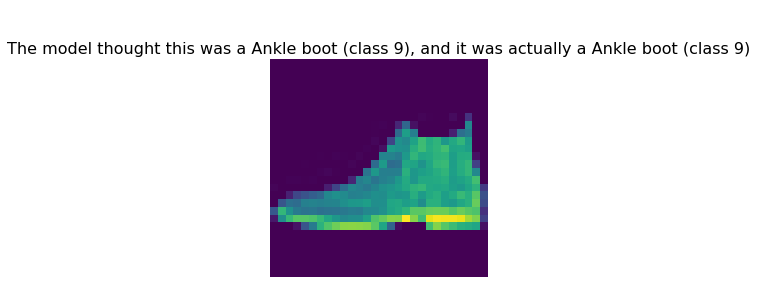

In [ ]:
#predicting one instance with the api and visualizing it
predictions = json.loads(json_response.text)['predictions']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_image(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_label[0]], test_label[0]))